# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [92]:
# All required libraries are imported here.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset and naming the data frame
crops = pd.read_csv("soil_measures.csv")

# Display the basic information about the DataFrame
print("DataFrame Information:")
print(crops.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


In [93]:
# Determine the number of unique crops in the crops DataFrame
num_crops = crops['crop'].nunique()
print("\nNumber of Unique Crops:", num_crops)


Number of Unique Crops: 22


In [94]:
# Check the crops DataFrame for missing values
missing_values = crops.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [95]:
# Verify that the data in each potential feature column is numeric
numeric_check = crops.apply(pd.to_numeric, errors='coerce').notnull().all()
print("\nNumeric Data Check:")
print(numeric_check)


Numeric Data Check:
N        True
P        True
K        True
ph       True
crop    False
dtype: bool


Note that apply**(pd.to_numeric, errors='coerce')** is used to attempt to convert each column to numeric data. The errors='coerce' argument ensures that if the conversion fails (e.g., due to non-numeric values), those values will be replaced with NaN. The **.notnull().all()** part then checks if all values in the column are numeric (i.e., not NaN).

The next set of steps is to split the data into training and test sets, setting test_size equal to 20% and using a random_state of 42.

In [96]:
# Select the feature columns (N, P, K, ph) and the target column (crop)
X = crops[['N', 'P', 'K', 'ph']]
y = crops['crop']

To split the data into training and test sets using the specified parameters, you can use the train_test_split function from the sklearn.model_selection module. 

In [97]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                    random_state=42)
# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 4)
X_test shape: (440, 4)
y_train shape: (1760,)
y_test shape: (440,)


In this code, X represents the feature columns (N, P, K, ph) and y represents the target column (crop). The train_test_split function splits the data into training and test sets, with 80% of the data used for training (X_train, y_train) and 20% for testing (X_test, y_test). The random_state parameter is set to 42 to ensure reproducibility.

The next set of steps involves in predicting the "crop" type using each feature individually by looping over all the features, and, for each feature, fitting a Logistic Regression model and calculating f1_score(). When creating the model, setting max_iter to 2000 to ensure model can converge, and passing an appropriate string value to the multi_class keyword argument.

In [98]:
# Loop over each feature
for feature in X:
    # Create a Logistic Regression model
    model = LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42)
    
    # Fit the model using the current feature
    model.fit(X_train[[feature]], y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test[[feature]])
    
    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class problems
    
    print(f"F1 score for {feature}: {f1:.4f}")

F1 score for N: 0.1051
F1 score for P: 0.1046
F1 score for K: 0.2008
F1 score for ph: 0.0453


In this code, the loop iterates over each feature column (N, P, K, ph). For each feature, a Logistic Regression model is created with the specified max_iter and multi_class parameters. The model is trained on the training data for the current feature, and then used to predict the test data. The F1 score is calculated using the f1_score function with the 'weighted' average strategy, which is suitable for multi-class problems. The loop prints out the F1 score for each feature.

More details on the f-string formatting

f"F1 score for {feature}: {f1:.4f}": This is called an f-string or formatted string literal. It's a way to embed expressions inside string literals, using curly braces {} to enclose the expressions. When this string is printed, the expressions within the curly braces are evaluated and their values are inserted into the string.

F1 score for {feature}: Here, feature is a variable that contains the current feature name (N, P, K, or ph). The value of feature will be inserted at this position in the string.

: This is just a literal character in the string.

{f1:.4f}: Here, f1 is a variable that contains the calculated F1 score. The value of f1 will be formatted as a floating-point number with exactly 4 decimal places and inserted at this position in the string.

) and ": These are literal characters to close the print function and the f-string, respectively.

So, for example, if feature is "N" and f1 is 0.8721, then the output of the print statement will be: "F1 score for N: 0.8721".

Using f-strings makes it easier to format and display complex strings that involve variable values. It eliminates the need for manual string concatenation and formatting operations.






Now, In order to avoid selecting two features that are highly correlated, we will perform a correlation analysis for each pair of features, enabling us to build a final model without the presence of multicollinearity.

In [99]:
# Select the feature columns (N, P, K, ph)
features = ['N', 'P', 'K', 'ph']

# Calculate the correlation matrix
correlation_matrix = crops[features].corr()

# Display the correlation matrix
print("Correlation Matrix:" )
print(correlation_matrix)

Correlation Matrix:
           N         P         K        ph
N   1.000000 -0.231460 -0.140512  0.096683
P  -0.231460  1.000000  0.736232 -0.138019
K  -0.140512  0.736232  1.000000 -0.169503
ph  0.096683 -0.138019 -0.169503  1.000000


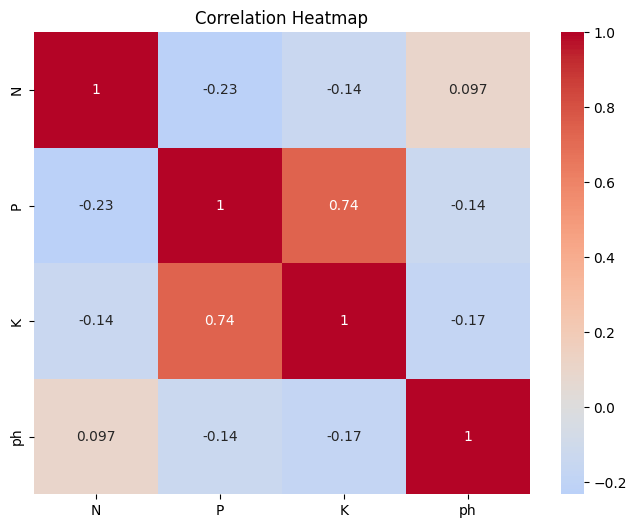

In [100]:
# Generate a heatmap to visualize the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In the above code:

1. We calculate the correlation matrix using df[features].corr(), which computes the correlation coefficients between all pairs of features.
2. We print the correlation matrix to see the correlation coefficients between the features.
3. We use the Seaborn library to create a heatmap that visually represents the correlation matrix. The annot=True argument adds the correlation values to the heatmap cells, and cmap='coolwarm' sets the color map to a cool-warm color palette.
4. We display the heatmap using plt.show().
5. In the correlation matrix and heatmap, you will see how correlated each pair of features is. High correlation coefficients (close to 1 or -1) suggest strong correlation, which could indicate multicollinearity. If you find that some pairs of features are highly correlated, you might consider removing one of the features to mitigate multicollinearity and improve the model's stability and interpretability.

Once we have the final features, train and test a new Logistic Regression model called log_reg, then evaluate performance using f1_score(), saving the metric as a variable called model_performance.

In [101]:
# Select the final feature columns and the target column (crop)
final_features = ['N','K',]  # selected features
target = 'crop'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops[target], test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42)
log_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = log_reg.predict(X_test)

# Calculate the F1 score for model evaluation
model_performance = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class problems

# Print the model's F1 score
#print("Model Performance (F1 Score):", model_performance)
print(f"Model Performance F1 score : {f1:.4f}")

Model Performance F1 score : 0.0453
